In [77]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
%matplotlib inline

In [79]:
filePrefix="/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/"
with open(filePrefix+"Longitudinal-X-Resultats-Recalcul.yaml", 'r') as stream:
    longitudinal=yaml.load(stream)

In [80]:
msp1Dict={}
msp2Dict={}
omp1Dict={}
omp2Dict={}
for k in longitudinal:
    if "Morphomes" in k:
        kSimple=k.strip("-X-Morphomes")
        omp1Dict[kSimple]=longitudinal[k]["Swim1"]
        omp2Dict[kSimple]=longitudinal[k]["Swim2"]
    else:
        kSimple=k.strip("-X")
        msp1Dict[kSimple]=longitudinal[k]["Swim1"]
        msp2Dict[kSimple]=longitudinal[k]["Swim2"]

In [81]:
msp1=pd.DataFrame.from_dict(msp1Dict,orient="index")
msp2=pd.DataFrame.from_dict(msp2Dict,orient="index")
omp1=pd.DataFrame.from_dict(omp1Dict,orient="index")
omp2=pd.DataFrame.from_dict(omp2Dict,orient="index")

In [82]:
del msp2[u"nbGoldForms"]
del omp1[u"nbGoldForms"]
del omp2[u"nbGoldForms"]
msp1.columns=[c+"-S1" if not c in ["nbGoldForms","nbInitialForms"] else c for c in msp1.columns]
msp2.columns=[c+"-S2" for c in msp2.columns]
omp1.columns=[c+"-M1" for c in omp1.columns]
omp2.columns=[c+"-M2" for c in omp2.columns]


In [83]:
msp1[["TP-S1","UG-S1","nbGoldForms"]]

,TP-S1,UG-S1,nbGoldForms
00-T10000-F3663,8505,45354,53859
01-T20000-F5816,16950,59685,76635
02-T30000-F7497,24618,65064,89682
03-T40000-F8900,31318,68324,99642
04-T50000-F10082,36322,72396,108718
05-T60000-F11252,41305,73543,114848
06-T70000-F12207,44658,74765,119424
07-T80000-F13155,48145,75984,124130
08-T90000-F14038,50839,76879,127719
09-T100000-F14858,53821,77431,131253


In [84]:
df=pd.merge(msp1,msp2, left_index=True, right_index=True)
df=pd.merge(df,omp1, left_index=True, right_index=True)
df=pd.merge(df,omp2, left_index=True, right_index=True)

In [85]:
df["forms"]=df.index.str.split("-").str[-1].str.strip("F").astype(int)
df["tokens"]=df.index.str.split("-").str[1].str.strip("T").astype(int)
df[["tokens","forms","nbInitialForms","nbGoldForms"]]

,tokens,forms,nbInitialForms,nbGoldForms
00-T10000-F3663,10000,3663,3663,53859
01-T20000-F5816,20000,5816,5816,76635
02-T30000-F7497,30000,7497,7497,89682
03-T40000-F8900,40000,8900,8900,99642
04-T50000-F10082,50000,10082,10082,108718
05-T60000-F11252,60000,11252,11252,114848
06-T70000-F12207,70000,12207,12207,119424
07-T80000-F13155,80000,13155,13155,124130
08-T90000-F14038,90000,14038,14038,127719
09-T100000-F14858,100000,14858,14858,131253


In [60]:
df[["FP-S1","TP-S1","UG-S1","OG-S1","FP-M1","TP-M1","UG-M1","OG-M1"]]

,FP-S1,TP-S1,UG-S1,OG-S1,FP-M1,TP-M1,UG-M1,OG-M1
00-T10000-F3663,495,8505,45354,123,5175,15215,38644,186
01-T20000-F5816,716,16950,59685,262,7630,32171,44464,482
02-T30000-F7497,682,24618,65064,401,3968,38573,51109,575
03-T40000-F8900,903,31318,68324,518,3103,45777,53865,690
04-T50000-F10082,1090,36322,72396,562,5583,52620,56098,813
05-T60000-F11252,1023,41305,73543,699,3773,55985,58863,874
06-T70000-F12207,1043,44658,74765,743,3834,61910,57513,923
07-T80000-F13155,1044,48145,75984,813,8628,66838,57291,1076
08-T90000-F14038,1244,50839,76879,912,4307,68105,59613,1139
09-T100000-F14858,1177,53821,77431,949,4348,72980,58272,1200


In [69]:
def makeGraph(x,colonnes,xlabel="Number of initial %s",ylabel="Score",size=(10,10)):
    scale=x
    ax=df.set_index(scale)[colonnes].plot(figsize=size)
    ax.set_xlabel(xlabel%scale,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)    

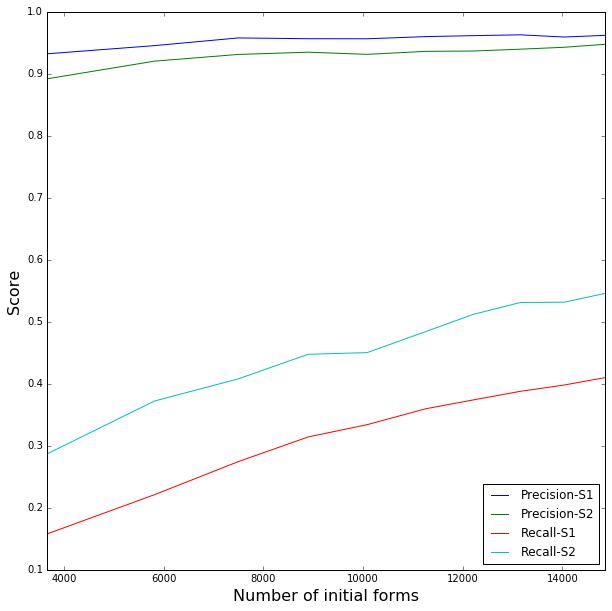

In [70]:
makeGraph("forms",["Precision-S1","Precision-S2","Recall-S1","Recall-S2"])

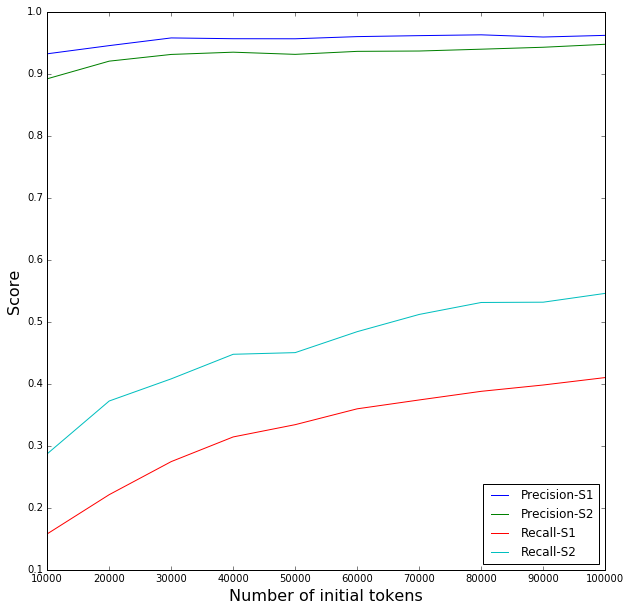

In [71]:
makeGraph("tokens",["Precision-S1","Precision-S2","Recall-S1","Recall-S2"])

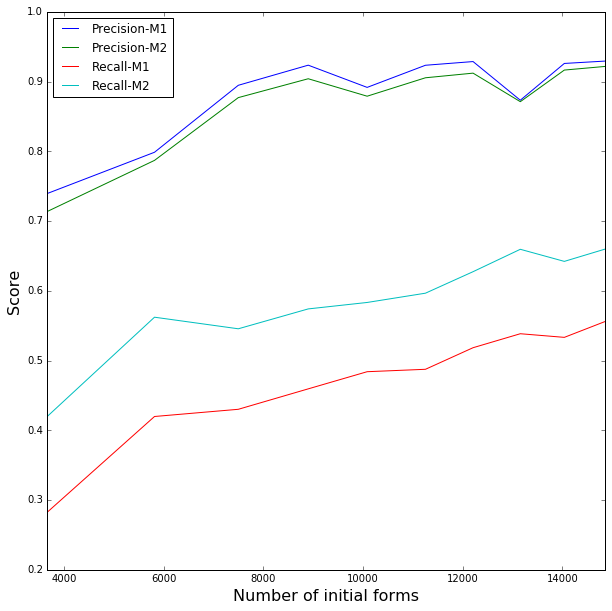

In [72]:
makeGraph("forms",["Precision-M1","Precision-M2","Recall-M1","Recall-M2"])

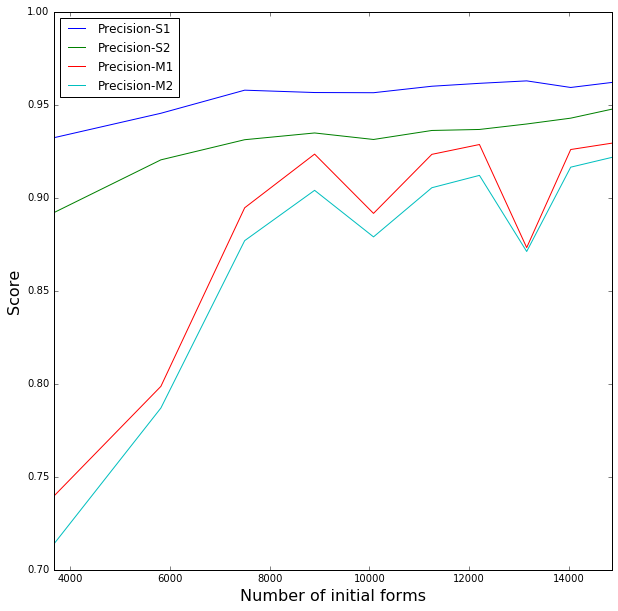

In [73]:
makeGraph("forms",["Precision-S1","Precision-S2","Precision-M1","Precision-M2"])

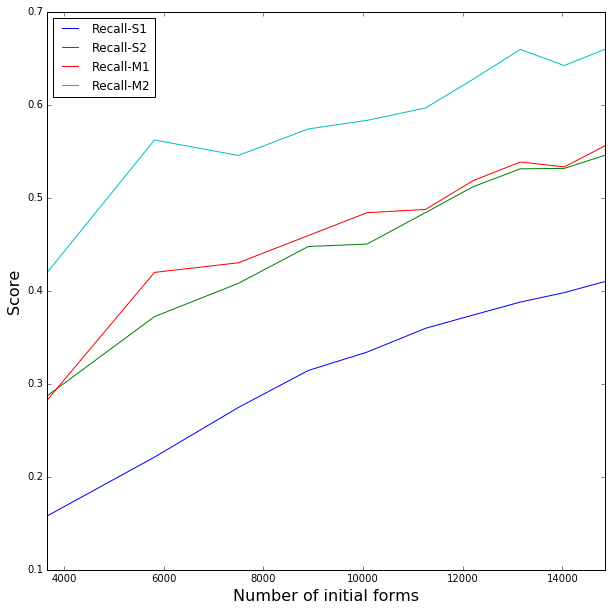

In [74]:
makeGraph("forms",["Recall-S1","Recall-S2","Recall-M1","Recall-M2"])

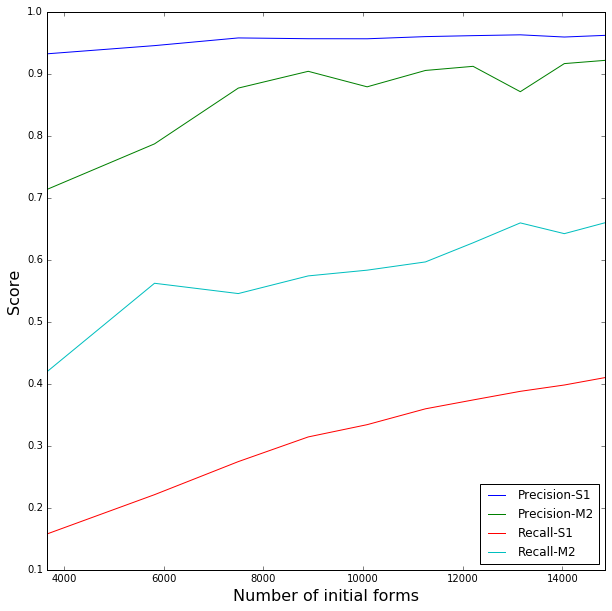

In [75]:
makeGraph("forms",["Precision-S1","Precision-M2","Recall-S1","Recall-M2"])

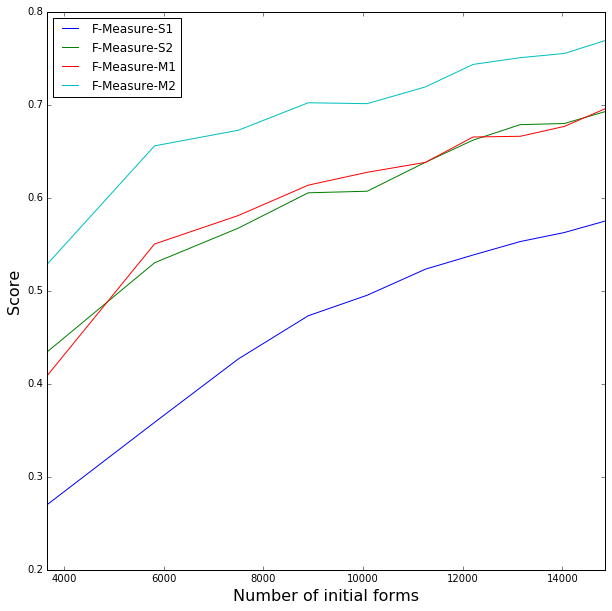

In [76]:
makeGraph("forms",["F-Measure-S1","F-Measure-S2","F-Measure-M1","F-Measure-M2"])